# MOVIE RECOMMENDER SYSTEM

### SREENATH S

## PROBLEM STATEMENT

Recommender systems are one of the most frequently practised and in-demand application of machine learning in industry. Almost every product company that holds a consumer-based product requires recommender systems to be deployed on their platforms. According to the reports published, Amazon generates nearly 35% of their revenue through their state of the art recommendation engines on their e-commerce platform.

As part of this project we need to develop a movie recommendation system based on:
1. Collaborative Filtering
2. Content Based Filtering
3. Hybrid Recommendation 


**NOTE: It is assumed that all the required input files are present in the same folder where this notebook is copied to.**


### IMPORTANT NOTE: 

The order in which these files needs to be run is given below.

### OBJECTIVE:

The objective of this project is to recommend relevant movies to users:
1. Based on their preferences and interactions with a variety of moview on the platform
2. Based on what other similar users on the platform consumes.

We'll be creating a hybrid recommender system to achieve this goal.

**DATASET**

We will be using the following datasets to help us create machine learning models,<br>

1. movies_metadata.csv: This file contains movie information such as Movie Id, Title, Average Rating, Overview, Genere, Popularity, Production etc.<br>
2. keywords.csv:  This file contains keyword for each movies.<br>
3. ratings.csv: User - Movie Ratings information is part of this file.

**PROCEDURE**

The procedure that should be followed for this project:
1. EDA(Exploratory data analysis)
2. Preprocessing
3. Recommendations Techniques:<br>
    3.1. Collaborative Filtering<br>
    3.2. Content-Based Filtering<br>
    3.3. Hybrid recommendations<br>
4. Evaluation Techniques
5. Comparisons

In this notebook we will be performing EDA and Dataprocessing. At the end of this notebook the processed content will be written on to an extenal file in CSV format and those will be used for actual recommendation model creation.

In [1]:
import re
import import_ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ast
from datetime import datetime
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
warnings.filterwarnings('ignore')
sns.set(style = 'whitegrid');
%matplotlib inline

### 1. EDA ON MOVIE METADATA

Let us first read the movies_metadata.csv and analyse the file

In [2]:
movie_metadata_df = pd.read_csv(r'movies_metadata.csv', engine = 'python')
movie_metadata_df.shape

(45466, 24)

There are 45466 rows with 24 columns. Let us see each columns in detail

In [3]:
movie_metadata_df.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [4]:
movie_metadata_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Before doing any analysis we will remove duplicate entries from the dataset if any.

In [5]:
movie_metadata_df = movie_metadata_df.drop_duplicates()
movie_metadata_df.shape

(45449, 24)

We will see how much of null values are present in each of these columns

In [6]:
movie_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45449 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45449 non-null  object 
 1   belongs_to_collection  4493 non-null   object 
 2   budget                 45449 non-null  object 
 3   genres                 45449 non-null  object 
 4   homepage               7780 non-null   object 
 5   id                     45449 non-null  object 
 6   imdb_id                45432 non-null  object 
 7   original_language      45438 non-null  object 
 8   original_title         45449 non-null  object 
 9   overview               44495 non-null  object 
 10  popularity             45444 non-null  object 
 11  poster_path            45063 non-null  object 
 12  production_companies   45446 non-null  object 
 13  production_countries   45446 non-null  object 
 14  release_date           45362 non-null  object 
 15  re

In [7]:
movie_metadata_info = round(((movie_metadata_df.isnull().sum())/len(movie_metadata_df))*100, 2)
movie_metadata_info

adult                     0.00
belongs_to_collection    90.11
budget                    0.00
genres                    0.00
homepage                 82.88
id                        0.00
imdb_id                   0.04
original_language         0.02
original_title            0.00
overview                  2.10
popularity                0.01
poster_path               0.85
production_companies      0.01
production_countries      0.01
release_date              0.19
revenue                   0.01
runtime                   0.58
spoken_languages          0.01
status                    0.19
tagline                  55.10
title                     0.01
video                     0.01
vote_average              0.01
vote_count                0.01
dtype: float64

As we can see belongs_to_collection, homepage, tagline features has more than 50% missing data. So we will be removing these columns. Though tagline can be handy in case of Content Based Filtering, but we have keyword dataset and overview field which should be good enough for us to come up with a CBF recommendation model.

In [8]:
movie_metadata_df = movie_metadata_df.drop(columns = ['belongs_to_collection', 'homepage', 'tagline'])

**1. STATUS**

This field indicastes the status of the movie, ie whether its released or currently in production etc.

In [9]:
movie_metadata_df.status.unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       None, 'Planned', 'Canceled'], dtype=object)

In [10]:
movie_metadata_df.groupby('status').size()

status
Canceled               2
In Production         20
Planned               15
Post Production       98
Released           44998
Rumored              229
dtype: int64

We will be considering only the released movies for recommendation purpose, there is no point in recommending a movie which is in production or still in planning phase. Hence we will reatin only those are already released.

In [11]:
movie_metadata_df = movie_metadata_df[movie_metadata_df.status == 'Released']

Will examine how many moview sre present after filtering only released movies. There should be 44998

In [12]:
movie_metadata_df.shape

(44998, 21)

**2. ADULT** - Indicates whether this is adult movie or not

In [13]:
movie_metadata_df['adult'].unique()

array(['False', 'True'], dtype=object)

In [14]:
movie_metadata_df.groupby('adult').size()

adult
False    44990
True         8
dtype: int64

**3. ID FIELD** - This is the id field in the movie_metadata dataset.

In [15]:
movie_metadata_df = movie_metadata_df.astype({"id": int})

In [16]:
movie_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44998 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 44998 non-null  object 
 1   budget                44998 non-null  object 
 2   genres                44998 non-null  object 
 3   id                    44998 non-null  int32  
 4   imdb_id               44983 non-null  object 
 5   original_language     44988 non-null  object 
 6   original_title        44998 non-null  object 
 7   overview              44078 non-null  object 
 8   popularity            44998 non-null  object 
 9   poster_path           44625 non-null  object 
 10  production_companies  44998 non-null  object 
 11  production_countries  44998 non-null  object 
 12  release_date          44920 non-null  object 
 13  revenue               44998 non-null  float64
 14  runtime               44747 non-null  float64
 15  spoken_languages   

In [17]:
movie_metadata_df.id.nunique()

44985

here we can see there are few movies with same id. Let us see which are ids are duplicated

In [18]:
duplicate = movie_metadata_df[movie_metadata_df.duplicated('id')] 
duplicate_id = list(duplicate.id)
print('Duplicate ids present in the dataset are: ', duplicate_id)

Duplicate ids present in the dataset are:  [14788, 22649, 13209, 77221, 109962, 84198, 110428, 69234, 132641, 15028, 4912, 10991, 12600]


Let us print those raws with duplicate id for further anlysis

In [19]:
duplicate = movie_metadata_df[movie_metadata_df.id.isin(duplicate_id)]
duplicate = duplicate.sort_values(by = ['id'])
duplicate

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
33826,False,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",4912,tt0270288,en,Confessions of a Dangerous Mind,"Television made him famous, but his biggest hi...",7.645827,/o3Im9nPLAgtlw1j2LtpMebAotSe.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2002-12-30,33013805.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Confessions of a Dangerous Mind,False,6.6,281.0
5865,False,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",4912,tt0270288,en,Confessions of a Dangerous Mind,"Television made him famous, but his biggest hi...",11.331072,/o3Im9nPLAgtlw1j2LtpMebAotSe.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2002-12-30,33013805.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Confessions of a Dangerous Mind,False,6.6,281.0
4114,False,16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",10991,tt0235679,ja,PokÃ©mon 3: The Movie,When Molly Hale's sadness of her father's disa...,10.264597,/5ILjS6XB5deiHop8SXPsYxXWVPE.jpg,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2000-07-08,68411275.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,PokÃ©mon: Spell of the Unknown,False,6.0,143.0
44821,False,16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",10991,tt0235679,ja,PokÃ©mon 3: The Movie,When Molly Hale's sadness of her father's disa...,6.480376,/5ILjS6XB5deiHop8SXPsYxXWVPE.jpg,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2000-07-08,68411275.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,PokÃ©mon: Spell of the Unknown,False,6.0,144.0
44826,False,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",12600,tt0287635,ja,åŠ‡å ´ç‰ˆãƒ�ã‚±ãƒƒãƒˆãƒ¢ãƒ³ã‚¹ã‚¿ãƒ¼ ã‚»ãƒ¬ãƒ“...,All your favorite PokÃ©mon characters are back...,6.080108,/bqL0PVHbQ8Jmw3Njcl38kW0CoeM.jpg,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2001-07-06,28023563.0,75.0,"[{'iso_639_1': 'ja', 'name': 'æ—¥æœ¬èªž'}]",Released,PokÃ©mon 4Ever: Celebi - Voice of the Forest,False,5.7,82.0
5535,False,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",12600,tt0287635,ja,åŠ‡å ´ç‰ˆãƒ�ã‚±ãƒƒãƒˆãƒ¢ãƒ³ã‚¹ã‚¿ãƒ¼ ã‚»ãƒ¬ãƒ“...,All your favorite PokÃ©mon characters are back...,7.072301,/bqL0PVHbQ8Jmw3Njcl38kW0CoeM.jpg,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2001-07-06,28023563.0,75.0,"[{'iso_639_1': 'ja', 'name': 'æ—¥æœ¬èªž'}]",Released,PokÃ©mon 4Ever: Celebi - Voice of the Forest,False,5.7,82.0
15765,False,2500,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",13209,tt0499537,fa,Offside,"Since women are banned from soccer matches, Ir...",1.529879,/nfkOkpudNNIjRrf0mTFVoiGzHyc.jpg,...,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",2006-05-26,0.0,93.0,"[{'iso_639_1': 'fa', 'name': 'Ù�Ø§Ø±Ø³ÛŒ'}]",Released,Offside,False,6.7,27.0
11342,False,2500,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",13209,tt0499537,fa,Offside,"Since women are banned from soccer matches, Ir...",1.52896,/nfkOkpudNNIjRrf0mTFVoiGzHyc.jpg,...,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",2006-05-26,0.0,93.0,"[{'iso_639_1': 'fa', 'name': 'Ù�Ø§Ø±Ø³ÛŒ'}]",Released,Offside,False,6.7,27.0
10419,False,1600000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",14788,tt0454792,en,Bubble,Set against the backdrop of a decaying Midwest...,3.185256,/w56oo9nREcF54sNXVYuE9QxZFjT.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2005-09-03,0.0,73.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Bubble,False,6.4,36.0
12066,False,1600000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",14788,tt0454792,en,Bubble,Set against the backdrop of a decaying Midwest...,3.008299,/w56oo9nREcF54sNXVYuE9QxZFjT.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2005-09-03,0.0,73.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Bubble,False,6.4,36.0


Visual analysis shows these are actual duplicates, hence we can remove these duplicates and retain only first occurrences.

In [20]:
movie_metadata_df = movie_metadata_df.drop_duplicates(subset=['id'])
print("Shape of movie data set is :", movie_metadata_df.shape)
print("Number of unique ids :", len(movie_metadata_df))

Shape of movie data set is : (44985, 21)
Number of unique ids : 44985


In [21]:
movie_metadata_info = round(((movie_metadata_df.isnull().sum())/len(movie_metadata_df))*100, 2)
movie_metadata_info

adult                   0.00
budget                  0.00
genres                  0.00
id                      0.00
imdb_id                 0.03
original_language       0.02
original_title          0.00
overview                2.05
popularity              0.00
poster_path             0.83
production_companies    0.00
production_countries    0.00
release_date            0.17
revenue                 0.00
runtime                 0.56
spoken_languages        0.00
status                  0.00
title                   0.00
video                   0.00
vote_average            0.00
vote_count              0.00
dtype: float64

**4. IMDB_ID**

NOTE: The relationship between the movies_metadata dataset and ratings_small data set are defined through the foreignkey 'imdb_id', defined in links_small dataset. We will look into it further when analysing rating_small and links_small adatsets.

In [22]:
movie_metadata_df['imdb_id'].head(5)

0    tt0114709
1    tt0113497
2    tt0113228
3    tt0114885
4    tt0113041
Name: imdb_id, dtype: object

In [23]:
movie_metadata_df['imdb_id'].nunique()

44970

Let us clean the imdb_id by deletion 'tt' from the the beginning, as we can see all the imdb_ids are prepended with 'tt' and convert this field to numeric field as it will be healpful in further processing. It will be more clear while analysing links_small csv where imdb_ids are not prepended with 'tt'.

Also we are removing all movies which doesnt have a valid imdb_id

In [24]:
movie_metadata_df = movie_metadata_df[~movie_metadata_df['imdb_id'].isnull()]

In [25]:
movie_metadata_df.shape

(44970, 21)

Apply the preprocessing steps to strip off the 'tt'

In [26]:
movie_metadata_df['imdb_id'] = movie_metadata_df['imdb_id'].apply(lambda x: x.strip('tt'))

In [27]:
movie_metadata_df = movie_metadata_df.astype({"imdb_id": int})

In [28]:
movie_metadata_df['imdb_id'].nunique()

44970

In [29]:
imdb_id_from_movie_meta = list(movie_metadata_df['imdb_id'].unique())

**5. GENRES** - This field provides the details on the genres of the movie.

In [30]:
movie_metadata_df['genres'].head(5)

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object

We can see that the data is a string representation of array of key value pairs. We are interested in the value part, which actually gives the different genres of the movie.

Below function is written to extract only genres from the given field.

In [31]:
def retrieve_content(data, field= 'name', seperator = " "):
    content = ''
    if data:
        data_obj = ast.literal_eval(data)
        data_lst  = [data[field] for data in data_obj]
        content = seperator.join(data_lst)
    return content  

Create a new feature from existing feature 'genres'. 

In [32]:
movie_metadata_df['movie_genre'] = movie_metadata_df.genres.apply(retrieve_content)

Print the original feature and newly created feature side by side and see the difference.

In [33]:
movie_metadata_df[['movie_genre', 'genres']].head(5)

,movie_genre,genres
0,Animation Comedy Family,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,Adventure Fantasy Family,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,Romance Comedy,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,Comedy Drama Romance,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,Comedy,"[{'id': 35, 'name': 'Comedy'}]"


Already extracetd the details from genres and created a new feature movie_genre. Hence we can safely remove the redundant feature 'genres'

In [34]:
movie_metadata_df = movie_metadata_df.drop(columns = ['genres'])

**6. ORIGINAL_LANGUAGE** - Original language in which this movie is made

In [35]:
movie_metadata_df.original_language.unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [36]:
movie_metadata_df.original_language.nunique()

89

This dataset contains movies from 89 different languages

In [37]:
movie_grouped_language = movie_metadata_df.groupby('original_language').size().sort_values(ascending=False)
movie_grouped_language.describe()

count       89.000000
mean       505.168539
std       3388.532296
min          1.000000
25%          2.000000
50%         12.000000
75%         97.000000
max      31924.000000
dtype: float64

As per above grouping, we can see 50% of languages has atleast 12 or more movies listed in this dataset

Let us plot top 45 languages based on number if movies

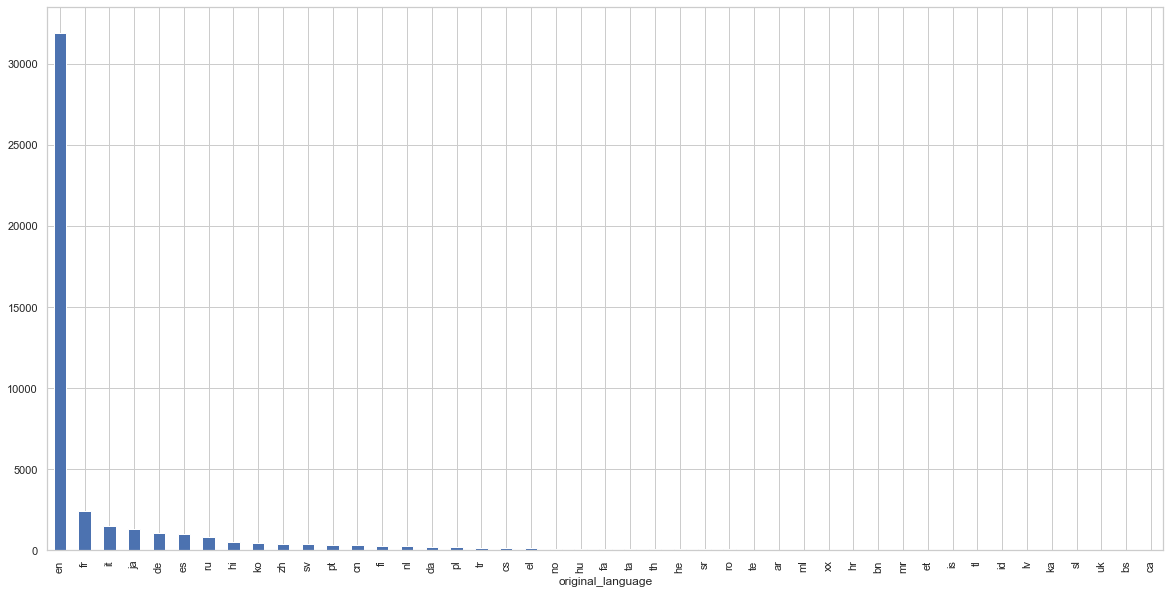

In [38]:
movie_grouped_language[:45].plot(kind='bar',figsize=(20,10))

In [39]:
lang_with_min_10_movies  = movie_grouped_language[movie_grouped_language > 10]
lang_with_min_10_movies.index

Index(['en', 'fr', 'it', 'ja', 'de', 'es', 'ru', 'hi', 'ko', 'zh', 'sv', 'pt',
       'cn', 'fi', 'nl', 'da', 'pl', 'tr', 'cs', 'el', 'no', 'hu', 'fa', 'ta',
       'th', 'he', 'sr', 'ro', 'te', 'ar', 'ml', 'xx', 'hr', 'bn', 'mr', 'et',
       'is', 'tl', 'id', 'lv', 'ka', 'sl', 'uk', 'bs', 'ca'],
      dtype='object', name='original_language')

**7. OVERVIEW**

This feature we will be using for CBF recommendation. Will tokenize and convert the feature to BOW representation later. Currently we do some sanity checks.

In [40]:
movie_metadata_df.overview.nunique()

43885

In [41]:
print('Number of movies with the overview information missing are: {}'.format(len(movie_metadata_df) - movie_metadata_df.overview.nunique()))

Number of movies with the overview information missing are: 1085


In [42]:
movie_metadata_df.overview.head(5)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

**8. ORIGINAL TITLE**

These are the movie title in the original language its made

In [43]:
movie_metadata_df.original_title.nunique()

42942

In [44]:
print('Number of movies with the title information missing are: {}'.format(len(movie_metadata_df) - movie_metadata_df.original_title.nunique()))

Number of movies with the title information missing are: 2028


**9. POPULARITY**

This is movie popularity feature. Let us convert it to float type.

In [45]:
movie_metadata_df[['popularity']].head(5)

,popularity
0,21.946943
1,17.015539
2,11.7129
3,3.859495
4,8.387519


In [46]:
movie_metadata_df = movie_metadata_df.astype({"popularity": float})

Plotting the popularity for each movies as a distribution plot and Boxplot

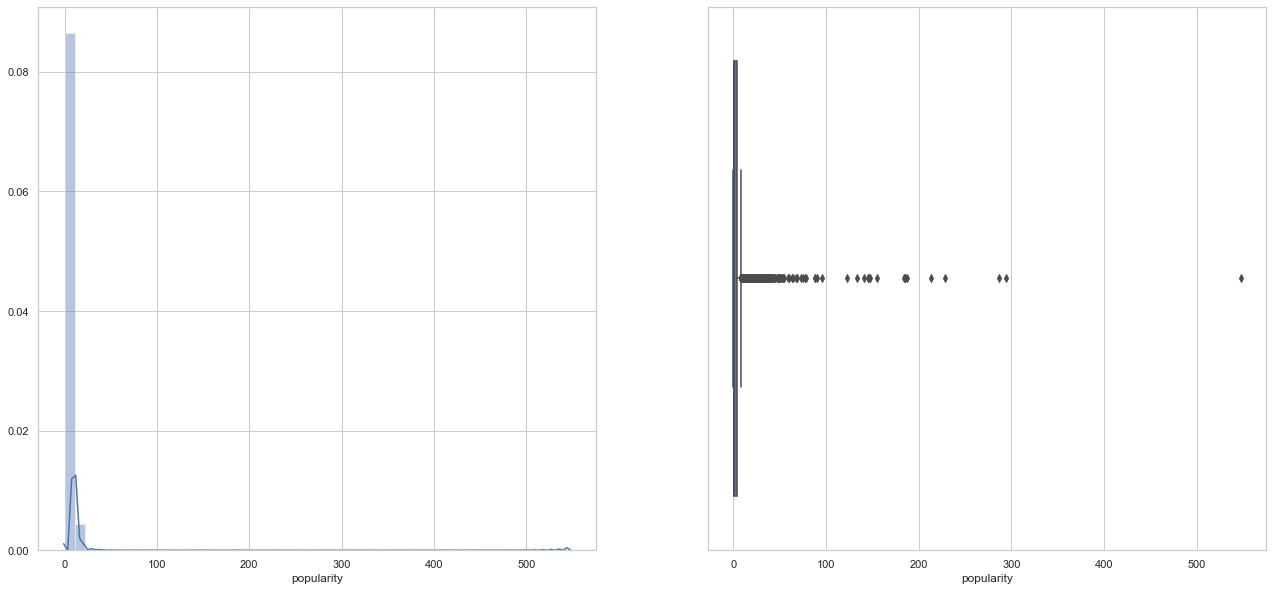

In [47]:
plt.figure(figsize = (22, 10))
plt.subplot(1, 2, 1)
sns.distplot(movie_metadata_df.popularity)
plt.subplot(1, 2, 2)
sns.boxplot(movie_metadata_df.popularity)

In [48]:
movie_metadata_df.popularity.describe()

count    44970.000000
mean         2.939439
std          6.025544
min          0.000000
25%          0.391021
50%          1.135689
75%          3.730199
max        547.488298
Name: popularity, dtype: float64

From this analysis we can see its a completely skewed distribution with max value around 547.5. But note that 75% of the movies has got popularity less that 3.7.

Not planning to use the data for content based filtering as:
1. Data is highly skewed.
2. If needed popularity can be calculated from the user interaction, which will be more appropriate

Hence removing this column.

In [49]:
movie_metadata_df = movie_metadata_df.drop(columns = ['popularity'])

**10. POSTER PATH**

This gives location to poster files. This will be useful only if we use an image matching technique for content based filtering.

In [50]:
movie_metadata_df.poster_path.head(5)

0    /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1    /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2    /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3    /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4    /e64sOI48hQXyru7naBFyssKFxVd.jpg
Name: poster_path, dtype: object

We are not going to do a poster based matching, hence we can safely remove this column from any analysis.

In [51]:
movie_metadata_df = movie_metadata_df.drop(columns = ['poster_path'])

**11. PRODUCTION COMPANIES**

This field gives info on production companies for each of these movies. But this field also arranged as key value pair.

In [52]:
movie_metadata_df.production_companies.head(5)

0       [{'name': 'Pixar Animation Studios', 'id': 3}]
1    [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2    [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3    [{'name': 'Twentieth Century Fox Film Corporat...
4    [{'name': 'Sandollar Productions', 'id': 5842}...
Name: production_companies, dtype: object

We are interested only on the production company name here, hence we wille xtract those details and create a new feature. Let us remove the old feature once we extracted useful info from it.

In [53]:
movie_metadata_df['movie_production'] = movie_metadata_df.production_companies.apply(lambda x: retrieve_content(x, 'name', seperator = ','))

In [54]:
movie_metadata_df[['production_companies','movie_production']].head(5)

,production_companies,movie_production
0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",Pixar Animation Studios
1,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","TriStar Pictures,Teitler Film,Interscope Commu..."
2,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","Warner Bros.,Lancaster Gate"
3,[{'name': 'Twentieth Century Fox Film Corporat...,Twentieth Century Fox Film Corporation
4,"[{'name': 'Sandollar Productions', 'id': 5842}...","Sandollar Productions,Touchstone Pictures"


In [55]:
movie_metadata_df = movie_metadata_df.drop(columns = ['production_companies'])

**12. PRODUCTION COUNTRIES**

Like other attributes this feature also stored as list of key value pairs, lets print first

In [56]:
movie_metadata_df.production_countries.head(5)

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3    [{'iso_3166_1': 'US', 'name': 'United States o...
4    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: production_countries, dtype: object

Extract only country code and created a new feature

In [57]:
movie_metadata_df['production_country'] = movie_metadata_df.production_countries.apply(lambda x: retrieve_content(x, 'iso_3166_1', seperator = ' '))

In [58]:
movie_metadata_df[['production_countries', 'production_country']].head(5)

,production_countries,production_country
0,"[{'iso_3166_1': 'US', 'name': 'United States o...",US
1,"[{'iso_3166_1': 'US', 'name': 'United States o...",US
2,"[{'iso_3166_1': 'US', 'name': 'United States o...",US
3,"[{'iso_3166_1': 'US', 'name': 'United States o...",US
4,"[{'iso_3166_1': 'US', 'name': 'United States o...",US


Drop the redundant feature

In [59]:
movie_metadata_df = movie_metadata_df.drop(columns = ['production_countries'])

**13. RELEASE_DATE**

This field indicates release date for these movies

In [60]:
movie_metadata_df.release_date.head(5)

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-02-10
Name: release_date, dtype: object

Will convert the field to datetime type

In [61]:
movie_date = movie_metadata_df[['release_date']] 
movie_date.dropna(inplace = True)

movie_date['release_date']=movie_date['release_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

Group and plot the number of movies released based on the year

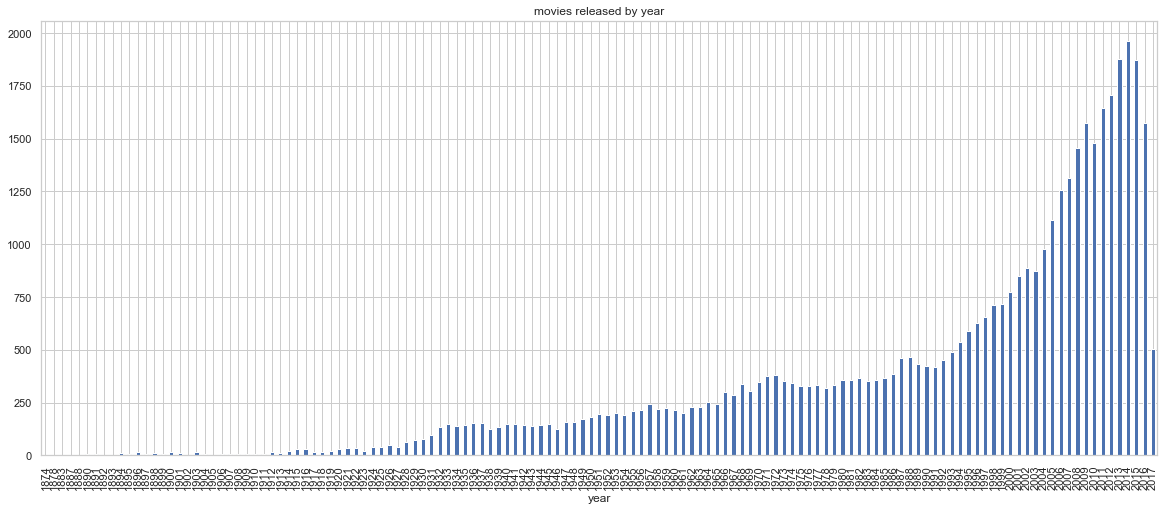

In [62]:
movie_date['year'] = movie_date['release_date'].apply(lambda x: '{0}'.format(x.year))
movie_date.groupby('year').size().plot(kind='bar', title='movies released by year', figsize = (20, 8))

In [63]:
movie_date['year'].min()

'1874'

In [64]:
movie_date['year'].max()

'2017'

As per the details we noticed above, dataset contains movies from 1874 to 2017

**14. REVENUE**

This is movie revenue field, will print max and min revenue from this dataset

In [65]:
movie_metadata_df.revenue.max()

2787965087.0

In [66]:
movie_metadata_df.revenue.min()

0.0

Now we will see how the revenue distribution per movie

In [67]:
movie_metadata_df.revenue.describe()

count    4.497000e+04
mean     1.132607e+07
std      6.467045e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

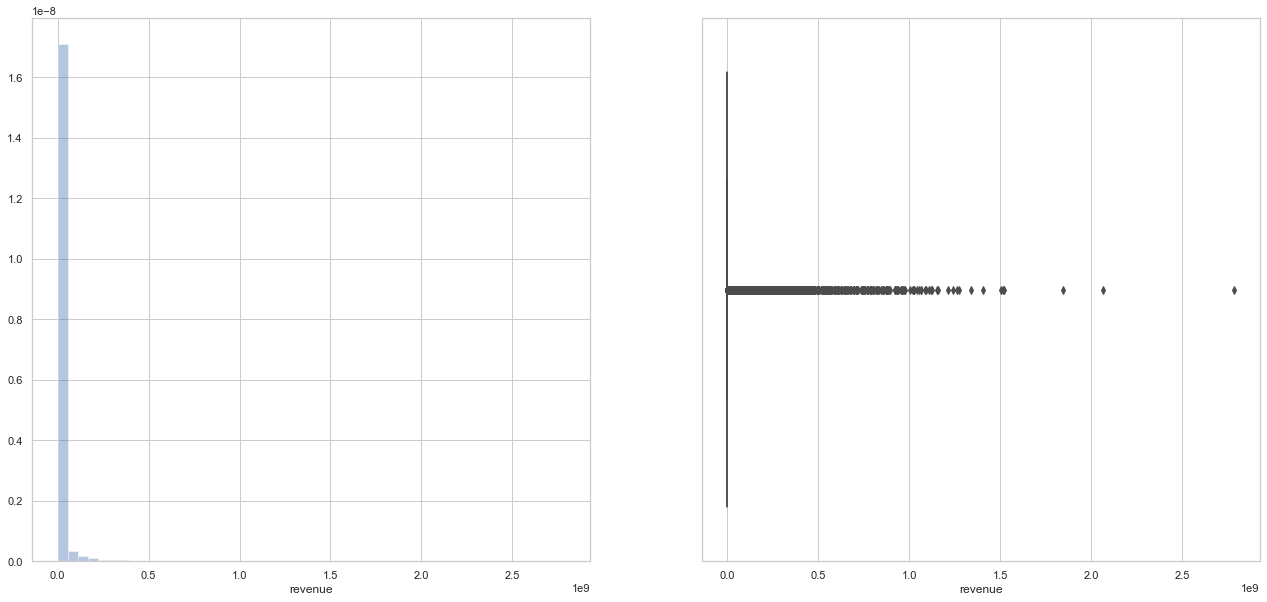

In [68]:
plt.figure(figsize = (22, 10))
plt.subplot(1, 2, 1)
sns.distplot(movie_metadata_df.revenue)
plt.subplot(1, 2, 2)
sns.boxplot(movie_metadata_df.revenue)

In [69]:
(len(movie_metadata_df[movie_metadata_df.revenue == 0])/len(movie_metadata_df))*100

83.57794084945519

Almost 83.5% movies are having 0 revenue as per this dataset. This can be dataset issue as well, but not much insight from this feature. Hence the clumn will bedropped.

In [70]:
movie_metadata_df = movie_metadata_df.drop(columns = ['revenue'])

**15. SPOKEN_LANGUAGES**

This feature indicates in which all language movie is made

In [71]:
movie_metadata_df.spoken_languages.head(5)

0             [{'iso_639_1': 'en', 'name': 'English'}]
1    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2             [{'iso_639_1': 'en', 'name': 'English'}]
3             [{'iso_639_1': 'en', 'name': 'English'}]
4             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, dtype: object

Extract only language details from the feature and will remove the redundant feature after the processing

In [72]:
movie_metadata_df['spoken_language'] = movie_metadata_df.spoken_languages.apply(lambda x: retrieve_content(x, 'iso_639_1', seperator = ' '))

In [73]:
movie_metadata_df[['spoken_languages', 'spoken_language']].head(5)

,spoken_languages,spoken_language
0,"[{'iso_639_1': 'en', 'name': 'English'}]",en
1,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",en fr
2,"[{'iso_639_1': 'en', 'name': 'English'}]",en
3,"[{'iso_639_1': 'en', 'name': 'English'}]",en
4,"[{'iso_639_1': 'en', 'name': 'English'}]",en


In [74]:
movie_metadata_df = movie_metadata_df.drop(columns = ['spoken_languages'])

**16. TITLE**

This is similar to original_title. But there are a few dfference.Lets see what is the difference between the original_title and title field.

In [75]:
mismatch = []
for title, original_title in zip(list(movie_metadata_df.title), list(movie_metadata_df.original_title)):
    if original_title != title:
        mismatch.append((original_title, title))
        
mismatch[:10]   

[('La CitÃ© des Enfants Perdus', 'The City of Lost Children'),
 ('æ‘‡å•Šæ‘‡ï¼Œæ‘‡åˆ°å¤–å©†æ¡¥', 'Shanghai Triad'),
 ('Guillaumet, les ailes du courage', 'Wings of Courage'),
 ('Il postino', 'The Postman'),
 ('Le confessionnal', 'The Confessional'),
 ('Gazon maudit', 'French Twist'),
 ('Les misÃ©rables', 'Les Miserables'),
 ('Ø¨Ø§Ø¯Ú©Ù†Ú© Ø³Ù�ÛŒØ¯', 'The White Balloon'),
 ('Antonia', "Antonia's Line"),
 ('Keiner liebt mich', 'Nobody Loves Me')]

As we can see mostly these are same cinemas only langiage is different

**17. VIDEO**

We will group the feature based on the value of this field and see the pattern

In [76]:
movie_metadata_df.video.nunique()

2

In [77]:
movie_metadata_df.video.unique()

array(['False', 'True'], dtype=object)

In [78]:
movie_metadata_df.groupby('video').size()

video
False    44877
True        93
dtype: int64

**18. VOTE_AVERAGE** 

This indicates the vote average for each movie. Let us see how this data looks like in this dataset.

In [79]:
movie_metadata_df.vote_average.describe()

count    44970.000000
mean         5.624172
std          1.915336
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

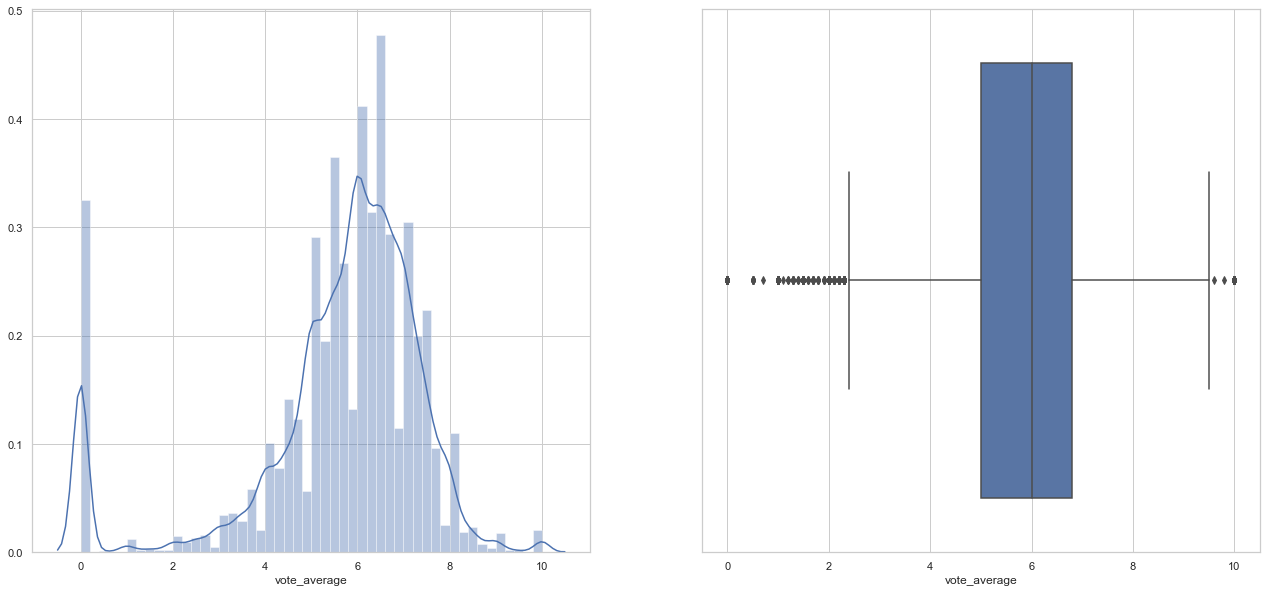

In [80]:
plt.figure(figsize = (22, 10))
plt.subplot(1, 2, 1)
sns.distplot(movie_metadata_df.vote_average)
plt.subplot(1, 2, 2)
sns.boxplot(movie_metadata_df.vote_average)

**19. VOTE_COUNT**

Let us understand how many number of votes are received for each movie

In [81]:
movie_metadata_df.vote_count.describe()

count    44970.000000
mean       110.962130
std        493.860887
min          0.000000
25%          3.000000
50%         10.000000
75%         35.000000
max      14075.000000
Name: vote_count, dtype: float64

50% of the movies got atleast 10 or more votes

**20. BUDGET**

This feature indicates movie budget. We will convert the data type to float first. 

In [82]:
movie_metadata_df=movie_metadata_df.astype({'budget':float})

Will see how this data distribution is

In [83]:
movie_metadata_df.budget.describe()

count    4.497000e+04
mean     4.266441e+06
std      1.751220e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

In [84]:
(len(movie_metadata_df[movie_metadata_df.budget == 0])/len(movie_metadata_df))*100

80.31354236157439

Almost 80% of movie in this dataset is marked as budget 0. It is very clear that it cant be true, hence its data issue. Will remove this feature as well

In [85]:
movie_metadata_df = movie_metadata_df.drop(columns = ['budget'])

**We have done with initial clean up of the movie_metadata dataset. Removed those columns which are of not interest as per our initial analysis. Let us store the unique imdbIds from the metadata file. This we will be using further for merging of the ratings dataset.**

In [86]:
unique_movie_ids = list(movie_metadata_df.id.unique())
len(unique_movie_ids)

44970

### 2.  EDA ON LINKS_SMALL DATASET

Let us load links_small.csv. This file acts as an interconnection table between the movie_metadata and ratings_small. As we have already seen while exploring movie_metadata each movie has got an imdb_id field which is a unique identification of movies. Whereas the ratings_small doesnt have imdb_id, rather it has movieId field. The link_small data file contains the mapping from movieId to imdbId. 

Hence using the link_small.csv we will be able to relate the datasets movies_metadata and rating_small.

In [87]:
links_small = pd.read_csv('links_small.csv')
links_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


In [88]:
links_small.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [89]:
links_small.shape

(9125, 3)

**1. MOVIE ID**

These are the movie ids present in in links_small dataset. We will see how many unique ids are present.

In [90]:
links_small.movieId.head(5)

0    1
1    2
2    3
3    4
4    5
Name: movieId, dtype: int64

In [91]:
links_small.movieId.nunique()

9125

**2. TMDB ID**

These are the tmdb ids present in in links_small dataset. We will see how many unique ids are present.

In [92]:
links_small.tmdbId.head(5)

0      862.0
1     8844.0
2    15602.0
3    31357.0
4    11862.0
Name: tmdbId, dtype: float64

In [93]:
links_small.tmdbId.nunique()

9112

**3. IMDB ID**

This field is important to us, for every movieId in rating_small dataset corresponding imdb id can e found from this field.

In [94]:
links_small.imdbId.head(5)

0    114709
1    113497
2    113228
3    114885
4    113041
Name: imdbId, dtype: int64

In [95]:
links_small.imdbId.nunique()

9125

### 3. EDA ON RATINGS_SMALL DATASET

RATINGS_SMALL - This data set contains user item interaction details. It contains the ratings given by different user for different movie. This is one of the main input for collaborative filtering.

Note that here the unique identification is movieId, to relate the movie_metadata dataset with rating_small we need to use intersction table link_csv. Where the imdbid will acts like a foreign key.

In [96]:
ratings_small = pd.read_csv('ratings_small.csv')
ratings_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [97]:
ratings_small.shape

(100004, 4)

There are about 100004 ratings in this dataset with 4 features

In [98]:
ratings_small.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


**1. USER ID**

We will analyse how many unique users are present in this dataset:

In [99]:
ratings_small.userId.nunique()

671

We can observe there are 671 unique users. Lets see how many inetractions each user has made as per this dataset

In [100]:
ratings_small.groupby('userId')['movieId'].size().describe()

count     671.000000
mean      149.037258
std       231.226948
min        20.000000
25%        37.000000
50%        71.000000
75%       161.000000
max      2391.000000
Name: movieId, dtype: float64

Minimum number of review made by any user is 20 as per this dataset. Which is a very good number for starting with colaborative filtering as users latent behavior can be well captured due to rich interaction pattern. Lets print the user id along with number of intractions

In [101]:
ratings_small.groupby('userId')['movieId'].size().sort_values(ascending=False)

userId
547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
444      20
445      20
448      20
498      20
1        20
Name: movieId, Length: 671, dtype: int64

**As we can see the minimum interaction between user and movie list is 20. Which is a good number for deriving collatborative as well as content based filtering. No need to remove any of the user.**

In [102]:
ratings_small.groupby(['userId', 'movieId']).size().groupby('userId').size()

userId
1       20
2       76
3       51
4      204
5      100
      ... 
667     68
668     20
669     37
670     31
671    115
Length: 671, dtype: int64

**2.MOVIE ID**

This feature indicates the movieid. This is the unique identification for movies present in this dataset. 

In [103]:
ratings_small.movieId.nunique()

9066

There are only 9066 unique movies present in this dataset.

In [104]:
ratings_small.groupby('movieId')['userId'].size().describe()

count    9066.000000
mean       11.030664
std        24.050800
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       341.000000
Name: userId, dtype: float64

The data indicates 50% of the movies are reviewed and rated by 3 users or more.

**3. RATING**

These are the actual rating given by the user for each movie

In [105]:
ratings_small.rating.describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Almost 75 percentile of the movies has got rating of 3 or above. Minimum as low as 0.5 to max upto 5.

Let us check the average ratings per user

In [106]:
ratings_small.groupby(['userId']).rating.mean()

userId
1      2.550000
2      3.486842
3      3.568627
4      4.348039
5      3.910000
         ...   
667    3.647059
668    3.750000
669    3.351351
670    3.806452
671    3.917391
Name: rating, Length: 671, dtype: float64

In [107]:
ratings_small.groupby(['userId']).rating.describe()

,count,mean,std,min,25%,50%,75%,max
userId,,,,,,,,
1,20.0,2.550000,0.887041,1.0,2.0,2.5,3.0,4.0
2,76.0,3.486842,0.901753,1.0,3.0,3.0,4.0,5.0
3,51.0,3.568627,0.741752,2.0,3.0,3.5,4.0,5.0
4,204.0,4.348039,0.947616,1.0,4.0,5.0,5.0,5.0
5,100.0,3.910000,0.565775,1.5,3.5,4.0,4.0,5.0
...,...,...,...,...,...,...,...,...
667,68.0,3.647059,0.842255,2.0,3.0,4.0,4.0,5.0
668,20.0,3.750000,1.292692,1.0,3.0,4.0,5.0,5.0
669,37.0,3.351351,0.919427,2.0,3.0,3.0,4.0,5.0


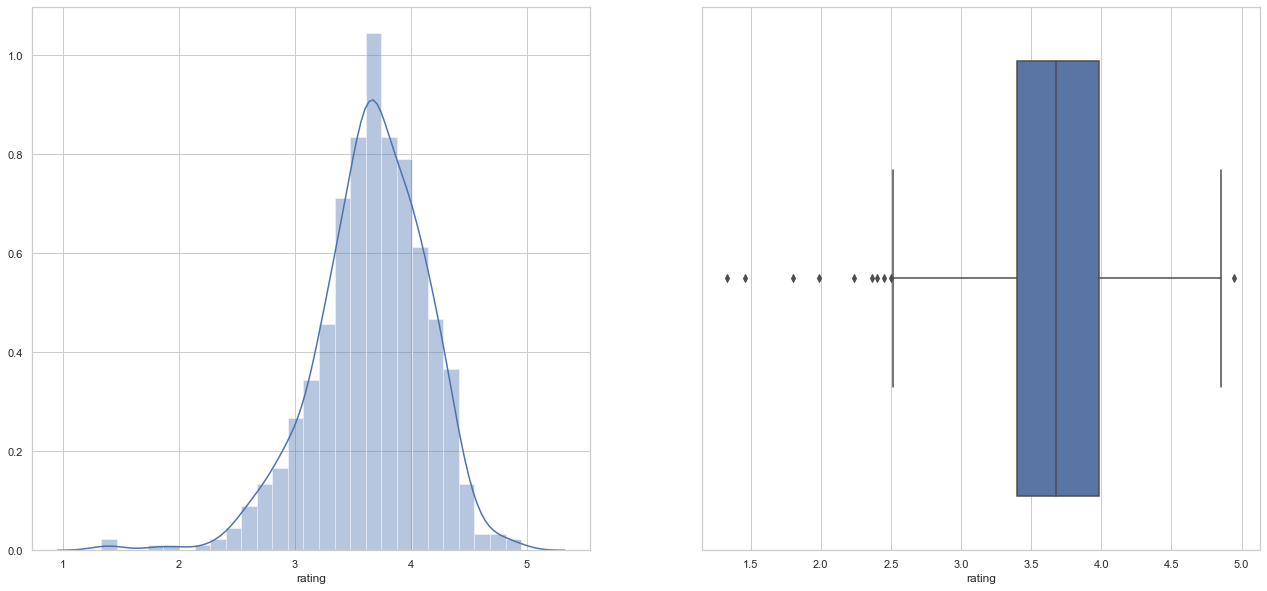

In [108]:
plt.figure(figsize = (22, 10))
plt.subplot(1, 2, 1)
sns.distplot(ratings_small.groupby(['userId']).rating.mean())
plt.subplot(1, 2, 2)
sns.boxplot(ratings_small.groupby(['userId']).rating.mean())

**4. TIMESTAMP**

We will convert the time stanp to datetime object

In [109]:
ratings_small['timestamp'] = ratings_small['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

In [110]:
ratings_small['timestamp'].min()

Timestamp('1995-01-09 17:16:49')

In [111]:
ratings_small['timestamp'].max()

Timestamp('2016-10-16 23:27:24')

The ratings are capture for the period 1995 to 2016

In [112]:
ratings_small.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

### MERGE RATING_SMALL DATASET WITH LINKS_SMALL DATSET 

There are 9125 unique movies in Link_small, but there are only 9066 movies in ratings. 
Let us merge links_small with ratings_small dataset on movieId column. The resultant DF will have imdbId as the primary key. 

In [113]:
ratings_with_imdb_id = pd.merge(left=ratings_small, right=links_small, left_on='movieId', right_on='movieId')

In [114]:
ratings_with_imdb_id.shape

(100004, 6)

After merging as well there are 100004 reviews present. This indicates that all the movies in the ratings_small dataset is present in links_small dataset as well

In [115]:
ratings_with_imdb_id.head(5)

,userId,movieId,rating,timestamp,imdbId,tmdbId
0,1,31,2.5,2009-12-14 08:22:24,112792,9909.0
1,7,31,3.0,1996-12-29 19:42:30,112792,9909.0
2,31,31,4.0,2010-05-11 07:09:13,112792,9909.0
3,32,31,4.0,1996-06-15 14:17:20,112792,9909.0
4,36,31,3.0,1996-11-04 03:10:02,112792,9909.0


Lets print count of unique movie id, imdb id and user id, to ensure merge hasnt resulted in any reduction. Since ratings_small is subset of links_small no reduction in any of the features are expected.

In [116]:
ratings_with_imdb_id.userId.nunique()

671

In [117]:
ratings_with_imdb_id.movieId.nunique()

9066

In [118]:
ratings_with_imdb_id.imdbId.nunique()

9066

Now let us extract only those field which are needed for Collaborative filtering from this merged Dataframe. The features we are interested in are:
1. userId<br>
2. imdbId<br>
3. rating<br>

Note that we are using imdbId as it is common between movie_metadata dataset and merged_dataset

**CREATING DATASET FOR COLLABORATIVE FILTERING**

In [119]:
rating_dataset = ratings_with_imdb_id[['userId', 'imdbId', 'rating']]

In [120]:
rating_dataset.shape

(100004, 3)

In [121]:
rating_dataset.head(5)

,userId,imdbId,rating
0,1,112792,2.5
1,7,112792,3.0
2,31,112792,4.0
3,32,112792,4.0
4,36,112792,3.0


### 4. EDA ON KEYWORDS DATASET

Read the dataset 'keyword'. This contains key word corresponding to each of the movie.

Note that keyword data set and movie_metadata dataset are closely related. Record in  movie_metadata dataset has got corresponding keyword entry in keyword dataset.

In [122]:
movie_keyword = pd.read_csv('keywords.csv')

In [123]:
movie_keyword.shape

(46419, 2)

Let us print the columns of movie_keyword dataset

In [124]:
movie_keyword.columns

Index(['id', 'keywords'], dtype='object')

Remove duplicate records if any

In [125]:
movie_keyword = movie_keyword.drop_duplicates()

In [126]:
movie_keyword.shape

(45432, 2)

The common field between movie_metadata and keyword is "id" field.

**1. ID FIELD:**

In [127]:
movie_keyword.id.nunique()

45432

**2. KEYWORDS**

In [128]:
movie_keyword['keywords'].head(5)

0    [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1    [{'id': 10090, 'name': 'board game'}, {'id': 1...
2    [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3    [{'id': 818, 'name': 'based on novel'}, {'id':...
4    [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...
Name: keywords, dtype: object

This field is also in the form of list of key value pair. We are interested only on value part so that we can use for creating a Bag of word representation.

Will extract only required data from the above field using th function which is written above.

In [129]:
movie_keyword['movie_keywords'] = movie_keyword.keywords.apply(lambda x: retrieve_content(x, 'name', seperator = ' '))

In [130]:
movie_keyword[['keywords', 'movie_keywords']].head(5)

,keywords,movie_keywords
0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",jealousy toy boy friendship friends rivalry bo...
1,"[{'id': 10090, 'name': 'board game'}, {'id': 1...",board game disappearance based on children's b...
2,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",fishing best friend duringcreditsstinger old men
3,"[{'id': 818, 'name': 'based on novel'}, {'id':...",based on novel interracial relationship single...
4,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",baby midlife crisis confidence aging daughter ...


Remove the original feature as we already extracted the details

In [131]:
movie_keyword = movie_keyword.drop(columns = ['keywords'])

In [132]:
movie_keyword.head(5)

,id,movie_keywords
0,862,jealousy toy boy friendship friends rivalry bo...
1,8844,board game disappearance based on children's b...
2,15602,fishing best friend duringcreditsstinger old men
3,31357,based on novel interracial relationship single...
4,11862,baby midlife crisis confidence aging daughter ...


### MERGING MOVIE METADATA AND KEYWORD DATASET 

Merge the moview_metadata df with movie_keyword df. The merge is performed on the id fiels. Resultant dataframe will have the keyword details as well.

In [133]:
movie_content_df = pd.merge(left=movie_metadata_df, right=movie_keyword, left_on='id', right_on='id')

In [134]:
movie_content_df.shape

(44969, 18)

In [135]:
movie_content_df.columns

Index(['adult', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'release_date', 'runtime', 'status', 'title', 'video',
       'vote_average', 'vote_count', 'movie_genre', 'movie_production',
       'production_country', 'spoken_language', 'movie_keywords'],
      dtype='object')

The resultant dataframe will be used for the content based filtering. Hence only retaining those fields which can be used for content based filtering.

In [136]:
movie_content_df = movie_content_df[['imdb_id', 'original_language', 'original_title', 'title', 'overview', 'movie_genre', 'movie_production', 'movie_keywords', 'spoken_language']]

In [137]:
movie_content_df.shape

(44969, 9)

Ensuring imdb_ids are unique.

In [138]:
movie_content_df.imdb_id.nunique()

44969

**FILTERING ONLY THE SUBSET OF MOVIES USED IN RATINGS DATASET**

Note that the movie_metadata dataset is an extensive data covering almost 45000 movies. But ratings_small is only capturing the user -moview interaction only for 9000+ movies. Hence we will be considering only those movies which are present in the ratings dataset. We are not considering all the movies in movie_metadata.

In [139]:
rating_imdb = rating_dataset[['imdbId']]

In [140]:
rating_imdb.shape

(100004, 1)

Lets filter only unique movies from the ratings dataset

In [141]:
rating_imdb = rating_imdb.drop_duplicates()
rating_imdb.shape

(9066, 1)

Perform an inner join between the imdb ids from ratings dataset and movie_metadata df. This is done to ensure that we are considering only those movies which are present in interaction matrix, for  content based filtering as well.

In [142]:
content_based_dataset = pd.merge(left=movie_content_df, right=rating_imdb, left_on='imdb_id', right_on='imdbId', how = 'inner')

In [143]:
content_based_dataset.shape

(8989, 10)

Here we can notice that some of the movies in the ratings dataset is not present in the movie_metadata. We can see after merge we have only 8989 movies, whereas ratings dataset has 9066.

In [144]:
content_based_dataset = content_based_dataset.drop(columns = ['imdb_id'])
content_based_dataset.shape

(8989, 9)

In [145]:
content_based_dataset.columns

Index(['original_language', 'original_title', 'title', 'overview',
       'movie_genre', 'movie_production', 'movie_keywords', 'spoken_language',
       'imdbId'],
      dtype='object')

In [146]:
content_based_dataset.original_language.nunique()

41

In [147]:
content_based_dataset.original_language.unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'cn', 'ru', 'es', 'sv', 'ja',
       'de', 'sr', 'bn', 'pt', 'vi', 'cs', 'da', 'nb', 'no', 'el', 'xx',
       'bo', 'ko', 'fi', 'sk', 'hu', 'bs', 'hi', 'is', 'he', 'pl', 'tr',
       'ps', 'th', 'uk', 'af', 'ro', 'ar', 'et', 'id'], dtype=object)

**FINAL RATINGS DATASET: CREATED BY FILTERING ONLY THE RATING CORRESPONDING TO COMMON MOVIES BETWEEN CONTENT AND MOVIE REVIEW DATASET**

In [148]:
rating_dataset_final  = rating_dataset[rating_dataset.imdbId.isin(list(content_based_dataset.imdbId.unique()))]

In [149]:
rating_dataset_final.shape

(99752, 3)

**Checking the number of users and user interactions**

In [150]:
rating_dataset_final.userId.nunique()

671

In [151]:
rating_dataset_final.groupby('userId')['imdbId'].size().describe()

count     671.000000
mean      148.661699
std       230.468582
min        19.000000
25%        37.000000
50%        71.000000
75%       160.000000
max      2374.000000
Name: imdbId, dtype: float64

We can notice that in final dataset also, for any user the minimum number of intaction is 19. Which is sufficient enough for collaborative filtering.

In [152]:
rating_dataset_final.rating.min()

0.5

In [153]:
rating_dataset_final.rating.max()

5.0

**STORE THESE FINAL DATASETS TO EXTERNAL CSV FILES**

In [154]:
rating_dataset_final.to_csv('RATINGS_DATASET.csv')

In [155]:
content_based_dataset.to_csv('MOVIE_CONTENT_DATASET.csv')